<a href="https://colab.research.google.com/github/mkkim007/AIFFEL/blob/main/%5BE_03%5DStickerCamera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [E-03] Ïπ¥Î©îÎùº Ïä§Ìã∞Ïª§Ïï± ÎßåÎì§Í∏∞



Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò

In [1]:
'''
!pip install opencv-python
!pip install cmake
!pip install dlib
'''

'\n!pip install opencv-python\n!pip install cmake\n!pip install dlib\n'

import module

In [2]:
import cv2                          # openCV - Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨
import matplotlib.pyplot as plt     # Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
import numpy as np                  # 
import dlib                         # ÏñºÍµ¥Í≤ÄÏ∂ú
import math

## 1.ÏÇ¨ÏßÑ Ï§ÄÎπÑÌïòÍ∏∞

###1.1 Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å Ïó∞Îèô

Î®ºÏ†Ä Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÏóê Ïó∞ÎèôÏùÑ Ìï¥ÏÑú ÏÇ¨ÏßÑÏùÑ Í∞ÄÏßÄÍ≥† Ïò§Í≤†ÏäµÎãàÎã§. 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


`model` Ìè¥ÎçîÏôÄ `image`Ìè¥ÎçîÎ•º ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.

In [4]:
!mkdir -p camera_sticker/models
!mkdir -p camera_sticker/images

Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÏóê ÏûàÎäî ÏÇ¨ÏßÑÎì§ÏùÑ `images` Ìè¥ÎçîÏóê copy Ìï¥Ï§çÎãàÎã§.

In [5]:
!cp /content/gdrive/MyDrive/Data/image.png camera_sticker/images
!cp /content/gdrive/MyDrive/Data/cat-whiskers.png camera_sticker/images

### 1.2. Ïù¥ÎØ∏ÏßÄ Î°úÎìú

Ïù¥Ï†ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Ï§ÄÎπÑÌïú Ïù¥ÎØ∏ÏßÄÎ•º Î∂àÎü¨ÏòµÎãàÎã§.  
Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏùΩÏñ¥ Ïò¨ ÎïåÎäî `cv.imread()` Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï©ÎãàÎã§.  
> #### cv.imread(fileName, flag)
- fileName : Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í≤ΩÎ°ú
- flag : Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ÏùΩÏùÑ Îïå option
    1. `cv2.IMREAD_COLOR`(1) : Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùÑ ColorÎ°ú ÏùΩÏñ¥Îì§ÏûÑ. Ìà¨Î™ÖÌïú Î∂ÄÎ∂ÑÏùÄ Î¨¥ÏãúÎêòÎ©∞, DefaultÍ∞í
    2. `cv2.IMREAD_GRAYSCALE`(0) : Ïù¥ÎØ∏ÏßÄÎ•º GrayscaleÎ°ú ÏùΩÏñ¥ Îì§ÏûÑ. Ïã§Ï†ú Ïù¥ÎØ∏ÏßÄ Ï≤òÎ¶¨Ïãú Ï§ëÍ∞ÑÎã®Í≥ÑÎ°ú ÎßéÏù¥ ÏÇ¨Ïö©.
    3. `cv2.IMREAD_UNCHANGED`(-1) : Ïù¥ÎØ∏ÏßÄÌååÏùºÏùÑ alpha channelÍπåÏßÄ Ìè¨Ìï®ÌïòÏó¨ ÏùΩÏñ¥ Îì§ÏûÑ.

[Ï∂úÏ≤ò - Ïù¥ÎØ∏ÏßÄ Îã§Î£®Í∏∞](https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html)


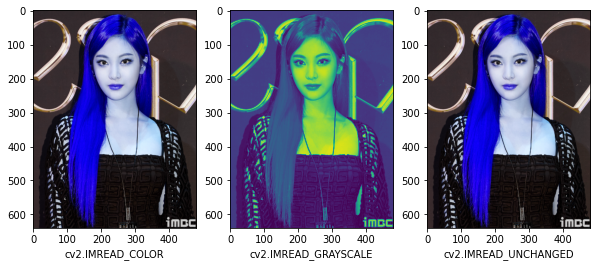

In [45]:
my_image_path = '/content/camera_sticker/images/image.png'
img_bgr_clolor = cv2.imread(my_image_path)                              # flag : 1
img_bgr_clolor = cv2.resize(img_bgr_clolor, (480,640))                  # 480X640 Ïùò ÌÅ¨Í∏∞Î°ú Resize

img_bgr_grayscale = cv2.imread(my_image_path, cv2.IMREAD_GRAYSCALE)     # flag : 0
img_bgr_grayscale = cv2.resize(img_bgr_grayscale, (480,640))            # 480X640 Ïùò ÌÅ¨Í∏∞Î°ú Resize

img_bgr_unchanged = cv2.imread(my_image_path, cv2.IMREAD_UNCHANGED)     # flag : -1
img_bgr_unchanged = cv2.resize(img_bgr_unchanged, (480,640))            # 480X640 Ïùò ÌÅ¨Í∏∞Î°ú Resize
img_show = img_bgr_clolor.copy()            # Ï∂úÎ†•Ïö© Ïù¥ÎØ∏ÏßÄ Î≥ÑÎèÑ Î≥¥Í¥Ä

fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_bgr_clolor)
ax1.set_xlabel('cv2.IMREAD_COLOR')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_bgr_grayscale)
ax2.set_xlabel('cv2.IMREAD_GRAYSCALE')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img_bgr_unchanged)
ax3.set_xlabel('cv2.IMREAD_UNCHANGED')

plt.rcParams["figure.figsize"] = (10,4)     #ÏÇ¨Ïù¥Ï¶à Ï°∞Ï†à
plt.show()

Î≠îÍ∞Ä ÏÉâÍ∞êÏù¥ Ïù¥ÏÉÅÌïòÍ≤å ÎÇòÏòµÎãàÎã§  Ïôú Í∑∏Îü¥ÍπåÏöî?  
Ïõ¨ÎßåÌïú Ïù¥ÎØ∏ÏßÄ ÎùºÏù¥Î∏åÎü¨Î¶¨(ex.matplotlib)Îäî Ïù¥ÎØ∏ÏßÄ Ï±ÑÎÑêÏùÑ **RGB(Îπ®Í∞ï, ÎÖπÏÉâ, ÌååÎûë)** ÏàúÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.  
Í∑∏Îü¨ÎÇò `opencv`Îäî Ïù¥ÎØ∏ÏßÄ Ï±ÑÎÑêÏùÑ **BGR(ÌååÎûë, ÎÖπÏÉâ, Îπ®Í∞ï)**ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.   
Í∑∏ÎûòÏÑú `plt.imshow` ÏÇ¨Ïö©ÌïòÍ∏∞Ï†ÑÏóê `CV2.cvtColor`Î•º ÏÇ¨Ïö©Ìï¥ RGB Ïù¥ÎØ∏ÏßÄÎ°ú Íº≠ Î∞îÍøîÏ§òÏïº Ìï©ÎãàÎã§.

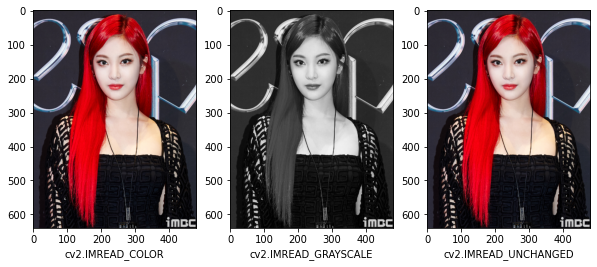

In [7]:
img_rgb = cv2.cvtColor(img_bgr_clolor, cv2.COLOR_BGR2RGB)
img_rgb_grayscale = cv2.cvtColor(img_bgr_grayscale, cv2.COLOR_BGR2RGB)
img_rgb_unchanged = cv2.cvtColor(img_bgr_unchanged, cv2.COLOR_BGR2RGB)


fig = plt.figure()
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(img_rgb)
ax1.set_xlabel('cv2.IMREAD_COLOR')

ax2 = fig.add_subplot(1,3,2)
ax2.imshow(img_rgb_grayscale)
ax2.set_xlabel('cv2.IMREAD_GRAYSCALE')

ax3 = fig.add_subplot(1,3,3)
ax3.imshow(img_rgb_unchanged)
ax3.set_xlabel('cv2.IMREAD_UNCHANGED')

plt.rcParams["figure.figsize"] = (10,4)     #ÏÇ¨Ïù¥Ï¶à Ï°∞Ï†à
plt.show()

## 2.ÏñºÍµ¥ Í≤ÄÏ∂ú

Ïö∞Î¶¨Îäî ÏñºÍµ¥ Í≤ÄÏ∂úÏùÑ ÏúÑÌï¥ÏÑú `dlib`Ìå®ÌÇ§ÏßÄÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.  
`dlib` Ïùò face detectorÎäî __HOG__(Histogram of Oriented Gradient) featureÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú __SVM__(Support Vector Machine)Ïùò sliding windowÎ°ú ÏñºÍµ¥ÏùÑ Ï∞æÏäµÎãàÎã§.  

ÏûêÏÑ∏Ìïú ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÏïÑÎûòÏùò ÎßÅÌÅ¨Ïóê ÏûàÏäµÎãàÎã§.  

[Í∏∞Í≥Ñ ÌïôÏäµÏùÄ Ï¶êÍ≤ÅÎã§! Part4](https://medium.com/@jongdae.lim/%EA%B8%B0%EA%B3%84-%ED%95%99%EC%8A%B5-machine-learning-%EC%9D%80-%EC%A6%90%EA%B2%81%EB%8B%A4-part-4-63ed781eee3c) 



In [8]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏

In [9]:
img_rgb = cv2.cvtColor(img_bgr_clolor, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, num of img pyramid)

rectangles[[(167, 116) (322, 270)]]


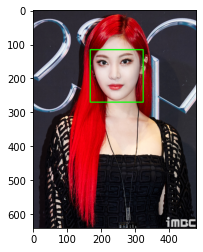

In [10]:
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3.ÏñºÍµ¥ ÎûúÎìúÎßàÌÅ¨

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-8-8.png)  

ÏñºÍµ¥ÏùÑ Ï∞æÏïòÎã§Î©¥ Ïù¥Ï†ú ÏñºÍµ¥Ïùò Ïù¥Î™©Íµ¨ÎπÑ ÏúÑÏπòÎ•º Ï∞æÏïÑÏïº Ìï©ÎãàÎã§! Í∑∏Îü¨Í∏∞ ÏúÑÌï¥ÏÑúÎäî face landmark location Í∏∞Ïà†ÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. Ï†ÄÌù¨Îäî DlibÏóêÏÑú Ï†úÍ≥µÌïòÎäî Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [11]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 
!mv shape_predictor_68_face_landmarks.dat.bz2 camera_sticker/models         
!cd camera_sticker/models && bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2021-07-26 15:21:14--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‚Äòshape_predictor_68_face_landmarks.dat.bz2‚Äô

shape_predictor_68_ 100%[===================>]  61.07M  36.2MB/s    in 1.7s    

2021-07-26 15:21:16 (36.2 MB/s) - ‚Äòshape_predictor_68_face_landmarks.dat.bz2‚Äô saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [12]:
model_path = 'camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [13]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


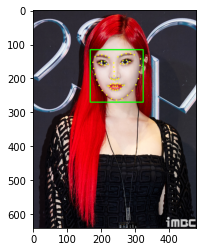

In [14]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

ÏúÑÏôÄ Í∞ôÏù¥ ÏñºÍµ¥Ïùò ÎûúÎìúÎßàÌÅ¨Í∞Ä Ïù¥ÎØ∏ÏßÄÏóê Ï†ïÌôïÌïòÍ≤å Ï∂úÎ†•Îêú Í≤ÉÏùÑ Î≥º ÏàòÍ∞Ä ÏûàÏäµÎãàÎã§.

## 4.Ïä§Ìã∞Ïª§ Ï†ÅÏö©ÌïòÍ∏∞

Ïù¥Ï†ú ÏΩîÏóê Í≥†ÏñëÏù¥ ÏàòÏóºÏùÑ Î∂ôÏó¨Î¥ÖÏãúÎã§.  
ÏôÑÏ†ÑÌûà ÏΩîÏóê Î∂ôÏù¥Í∏∞ Î≥¥Îã§Îäî Îàà(36)Í≥º ÏûÖÏà†(48) Î≥º(2) ÏúÑÏπòÏùò Ï§ëÍ∞ÑÏØ§Ïóê Î∂ôÏù¥ÎèÑÎ°ùÌïòÍ≤†ÏäµÎãàÎã§.

In [15]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30 
    x = landmark[30][0]     # xÎäî ÏΩîÍ∞Ä Ï§ëÏïôÏù¥ÎãàÍπå ÏΩîÎ°ú ÏÑ§Ï†ï
    y = (landmark[2][1]+landmark[36][1]+landmark[48][1])//3     # yÎäî ÏÑ∏Ï†êÏùò ÌèâÍ∑†ÏúºÎ°ú ÏÑ§Ï†ï
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(237, 193)
(x,y) : (237,188)
(w,h) : (156,156)


Ïä§Ìã∞Ïª§Î•º Î∂àÎü¨ÏôÄ Ïä§Ìã∞Ïª§Ïùò ÏÇ¨Ïù¥Ï¶àÎ•º ÏñºÍµ¥ Í≤ÄÏ∂úÌñàÎçò ÏÉÅÏûêÏùò ÌÅ¨Í∏∞Î°ú resize Ìï¥Ï§çÎãàÎã§.

In [16]:
sticker_path = '/content/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path)
print (img_sticker.shape)
img_sticker = cv2.resize(img_sticker, (w,h))

print (img_sticker.shape)

(512, 512, 3)
(156, 156, 3)


ÏúÑÏóêÏÑú ÏÑ§Ï†ïÌñàÎçò xÏôÄ yÎäî Ï§ëÏïôÍ∞í ÏúÑÏπòÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Í∞ÅÍ∞ÅÏùÑ top-leftÎ°ú Îã§Ïãú Ï†ïÏùòÌï¥Ï§çÎãàÎã§.

In [17]:
refined_x = x - w // 2  # left
refined_y = y - h // 2 # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (159,110)


ÎßåÏïΩÏóê Ïä§Ìã∞Ïª§Í∞Ä Î∞ñÏúºÎ°ú ÎÇòÍ∞ÑÎã§Î©¥ Ï†úÍ±∞Ìï¥Ï§çÎãàÎã§!

In [18]:
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0

if refined_x < 0:
    img_sticker = img_sticker[-refined_x:]
    refined_x = 0    




Ïù¥Ï†ú Ïù¥ÎØ∏ÏßÄÏóêÏÑú Ïä§Ìã∞Ïª§Ïùò ÌÅ¨Í∏∞ÎßåÌÅº crop ÌïòÏó¨ `sticker_area`ÎùºÍ≥† Ï†ïÏùòÌï¥Ï§çÎãàÎã§.  
ÎßåÏïΩ Ïä§Ìã∞Ïª§(`img_sticker`)Í∞Ä 255(Ìù∞ÏÉâ)Ïù¥Î©¥ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ(`sticker_area`)Î•º ÎÑ£Í≥† ÏïÑÎãàÎ©¥(Í≤ÄÏ†ïÏÉâ) Ïä§Ìã∞Ïª§ Ïù¥ÎØ∏ÏßÄ(`img_sticker`)Î•º ÎÑ£ÏäµÎãàÎã§ 

In [19]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

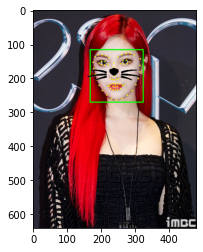

In [20]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

ÏúÑÏôÄ Í∞ôÏù¥ Ïûò ÎÇòÏò§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

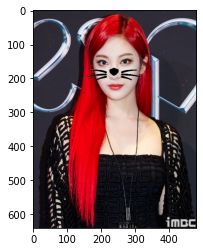

In [21]:
sticker_area = img_bgr_clolor[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr_clolor[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_clolor, cv2.COLOR_BGR2RGB))
plt.show()

Î∞ïÏä§ÏôÄ ÎûúÎìúÎßàÌÅ¨Î•º Î™®Îëê ÏïàÎ≥¥Ïù¥Í≤å ÌïòÍ≥† Ïã∂Îã§Î©¥ ÏïÑÍπå ÏúÑÏóêÏÑú Ï†úÏùº Ï≤òÏùåÏóê Î∂àÎü¨ÏôîÎçò `img_bgr_color`Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Í∑∏ ÏúÑÏóê ÎòëÍ∞ôÏùÄ Î∞©Î≤ïÏúºÎ°ú Í∑∏Î†§Ï§çÎãàÎã§!

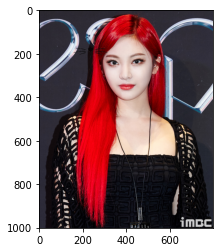

In [22]:
img_bgr_clolor = cv2.imread(my_image_path)
sticker_area = img_bgr_clolor[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr_clolor[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    cv2.addWeighted(sticker_area, 0.5, np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8), 0.5, 0)
plt.imshow(cv2.cvtColor(img_bgr_clolor, cv2.COLOR_BGR2RGB))
plt.show()

`cv2.addWeighted()`Î•º Ïù¥Ïö©Ìï¥ÏÑú Ï¢ÄÎçî ÏûêÏó∞Ïä§ÎüΩÍ≤å Ìà¨Î™ÖÌïú Í≥†ÏñëÏù¥ ÏàòÏóºÏùÑ ÎßåÎì§Ïñ¥ Î≥¥ÏïòÏäµÎãàÎã§. (~~Í∑ºÎç∞ ÏßÑÌïúÍ≤å Îçî ÏòàÏÅúÍ≤É Í∞ôÏïÑÏöî~~)

## 5.Îã§ÏñëÌïú ÏÇ¨ÏßÑÏúºÎ°ú Î¨∏Ï†úÏ†ê Ï∞æÏïÑÎ≥¥Í∏∞

### 5.1 Ï∏°Î©¥ ÏÇ¨ÏßÑ

####5.1.1 ÏïΩÍ∞Ñ Ï∏°Î©¥ ÏÇ¨ÏßÑ

In [23]:
!cp /content/gdrive/MyDrive/Data/side.jpg camera_sticker/images

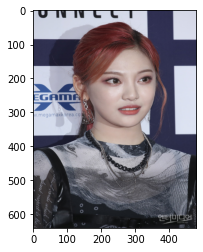

In [24]:
my_image_path = '/content/camera_sticker/images/side.jpg'
img_side = cv2.imread(my_image_path)   
img_side = cv2.resize(img_side, (480, 640))    
img_show = img_side.copy()     
plt.imshow(cv2.cvtColor(img_side, cv2.COLOR_BGR2RGB))
plt.show()

Î®ºÏ†Ä ÏïΩÍ∞ÑÏùò Ï∏°Î©¥ ÏÇ¨ÏßÑÏùÑ Îì§Í≥† ÏôîÏäµÎãàÎã§.

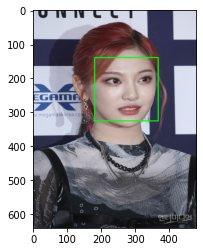

68


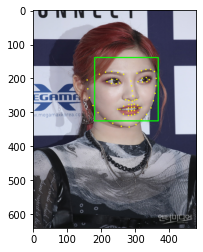

In [25]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_side, 1)   # detector_hog(image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_side, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

ÏñºÍµ¥ Í≤ÄÏ∂úÍ≥º ÎûúÎìúÎßàÌÅ¨ÎèÑ Ïûò ÎêòÎäî Í≤É Í∞ôÏäµÎãàÎã§.

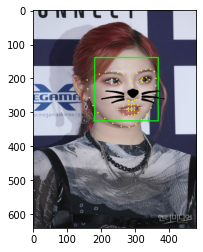

In [26]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = (landmark[2][1]+landmark[36][1]+landmark[48][1])//3
    w = dlib_rect.width()
    h = dlib_rect.width()


sticker_path = '/content/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))


refined_x = x - w // 2  # left
refined_y = y - h // 2 # top


if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0


sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

Í∑∏Î†áÎã§Î≥¥Îãà Í≥†ÏñëÏù¥ ÏàòÏóºÎèÑ Ïûò Îã¨Î¶¨Îäî Íµ∞Ïöî!

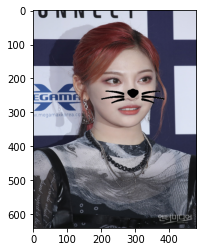

In [27]:
sticker_area = img_side[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_side[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_side, cv2.COLOR_BGR2RGB))
plt.show()

#### 5.1.2 ÏôÑÏ†ÑÌïú Ï∏°Î©¥ ÏÇ¨ÏßÑ

In [28]:
!cp /content/gdrive/MyDrive/Data/side2.jpg camera_sticker/images

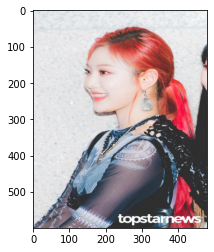

In [29]:
my_image_path = '/content/camera_sticker/images/side2.jpg'
img_side = cv2.imread(my_image_path)   
img_side = cv2.resize(img_side, (480, 600))    
img_show = img_side.copy()     
plt.imshow(cv2.cvtColor(img_side, cv2.COLOR_BGR2RGB))
plt.show()

Í∑∏ Îã§ÏùåÏúºÎ°ú Ï¢Ä Îçî Ï∏°Î©¥Ïù∏ ÏÇ¨ÏßÑÏùÑ Í∞ÄÏßÄÍ≥† ÏôÄÎ¥§ÏäµÎãàÎã§.

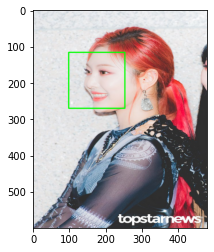

68


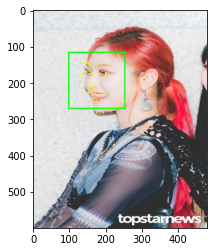

In [30]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_side, 1)   # detector_hog(image, num of img pyramid)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_side, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

Ïó≠ÏãúÎÇò ÏñºÍµ¥Í≤ÄÏ∂úÍ≥º ÎûúÎìúÎßàÌÇπ Î™®Îëê ÏûòÌï©ÎãàÎã§.

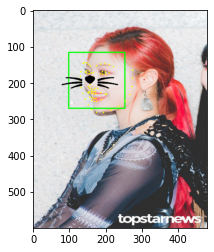

In [31]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = (landmark[2][1]+landmark[36][1]+landmark[48][1])//3
    w = dlib_rect.width()
    h = dlib_rect.width()


sticker_path = '/content/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))


refined_x = x - w // 2  # left
refined_y = y - h // 2 # top


if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0


sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

Í∑∏ÎûòÏÑú Ï†ÅÏ†àÌïú ÏúÑÏπòÏóê Ïûò Î∂ôÏäµÎãàÎã§.

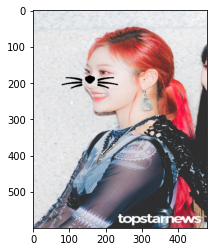

In [32]:
sticker_area = img_side[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_side[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_side, cv2.COLOR_BGR2RGB))
plt.show()

Í∑∏Îü¨ÎÇò Ï¢Ä Ï∞®ÏõêÏù¥ ÎÑàÎ¨¥ ÌèâÎ©¥Ï†ÅÏúºÎ°ú ÎÇòÏò§Í≤å ÎêòÎäî Í≤ÉÏù¥ Î¨∏Ï†úÏ†êÏù∏ Í≤É Í∞ôÏäµÎãàÎã§.

### 5.2 ÎèåÏïÑÍ∞Ñ ÏÇ¨ÏßÑ

#### 5.2.1 Í≥†Í∞úÍ∞Ä ÎèåÏïÑÍ∞Ñ ÏÇ¨ÏßÑ

In [33]:
!cp /content/gdrive/MyDrive/Data/rotation2.jpg camera_sticker/images

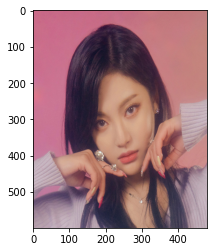

In [34]:
my_image_path = '/content/camera_sticker/images/rotation2.jpg'
img_rotation = cv2.imread(my_image_path)   
img_rotation = cv2.resize(img_rotation, (480, 600))    
img_show = img_rotation.copy()     
plt.imshow(cv2.cvtColor(img_rotation, cv2.COLOR_BGR2RGB))
plt.show()

Ïù¥Î≤àÏóêÎäî Í≥†Í∞úÍ∞Ä ÏïΩÍ∞Ñ ÎèåÏïÑÍ∞Ñ ÏÇ¨ÏßÑÏùÑ ÏÇ¨Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

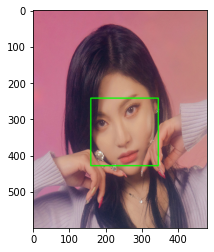

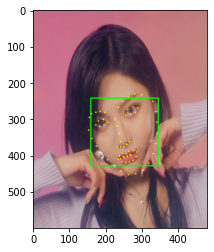

In [35]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rotation, 1)   # detector_hog(image, num of img pyramid)


for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rotation, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


Ïó≠ÏãúÎÇò ÏñºÍµ¥Í≤ÄÏ∂ú, ÎûúÎìúÎßàÌÅ¨ Îã§ ÏûòÎê©ÎãàÎã§.

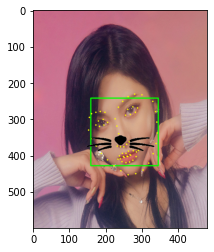

In [36]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = (landmark[2][1]+landmark[36][1]+landmark[48][1])//3
    w = dlib_rect.width()
    h = dlib_rect.width()


sticker_path = '/content/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))


refined_x = x - w // 2  # left
refined_y = y - h // 2 # top

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

Í∑∏Îü¨ÎÇò Í≥†ÏñëÏù¥Î•º Î∂ôÏó¨Ï£ºÍ≤å ÎêòÎ©¥ Ïù¥Î†áÍ≤å Ï¢Ä Î∂ÄÏûêÏó∞Ïä§ÎüΩÍ≤å Î∂ôÏó¨ÏßÄÍ≤å Îê©ÎãàÎã§.

Í∑∏ÎûòÏÑú ÏôºÏ™Ω Î≥º(2)ÏôÄ Ïò§Î•∏Ï™Ω Î≥º(14)Ïùò Í∏∞Ïö∏Í∏∞Î•º Íµ¨ÌïòÏó¨ Í∏∞Ïö∏Ïñ¥ÏßÑ Í∞ÅÎèÑÎ•º atanÎ•º Ïù¥Ïö©ÌïòÏó¨ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Íµ¨Ìï¥Ï§çÎãàÎã§.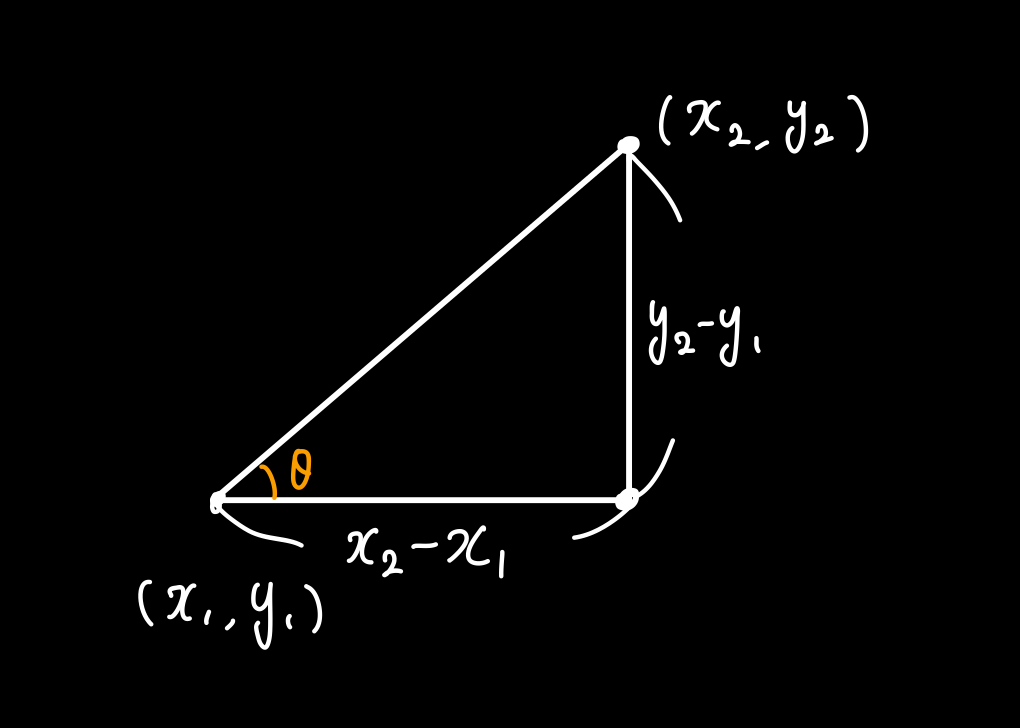

In [37]:
img_show = img_rotation.copy()          # ÏïÑÎ¨¥Í≤ÉÎèÑ ÏïàÍ∑∏Î†§ÏßÑ Ïù¥ÎØ∏ÏßÄ    
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):

    
    x = landmark[30][0]
    y = (landmark[2][1]+landmark[36][1]+landmark[48][1])//3
    x1 = landmark[2][0]
    x2 = landmark[14][0]
    y1 = landmark[2][1]
    y2 = landmark[14][1]
    w = dlib_rect.width()
    h = dlib_rect.width()



sticker_path = '/content/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path)

img_sticker = cv2.resize(img_sticker, (w,h))

angle = math.atan((abs(y2-y1))/(abs(x2-x1)))/math.pi*180

Í∞ÅÎèÑÎ•º Íµ¨ÌñàÎã§Î©¥ `getRotationMatrix`Î•º Ïù¥Ïö©ÌïòÏó¨ ÌöåÏ†ÑÏùÑ ÏãúÏºúÏ§çÎãàÎã§. Ïó¨Í∏∞ÏÑú Ï£ºÏùòÌï† Ï†êÏùÄ ÎèåÎ†§ÏÑú ÏÉùÍ∏¥ ÎπàÏπ∏Îì§ÏùÑ `borderValue` Ïù∏ÏûêÎ•º Ïù¥Ïö©ÌïòÏó¨ Ï†ÑÎ∂Ä Ìù∞ÏÉâ(255,255,255)Î°ú Ï±ÑÏõåÏ§òÏïº Ìï©ÎãàÎã§.

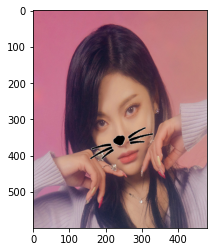

In [38]:

matrix = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
img_sticker_rotation = cv2.warpAffine(img_sticker, matrix, (w, h),borderValue=(255,255,255))

refined_x = x - w // 2  # left
refined_y = y - h // 2 # top

if refined_y < 0:
    img_sticker_rotation = img_sticker_rotation[-refined_y:]
    refined_y = 0


sticker_area = img_show[refined_y:refined_y+img_sticker_rotation.shape[0], refined_x:refined_x+img_sticker_rotation.shape[1]]
img_show[refined_y:refined_y+img_sticker_rotation.shape[0], refined_x:refined_x+img_sticker_rotation.shape[1]] = \
    np.where(img_sticker_rotation==255,sticker_area,img_sticker_rotation).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

ÏßúÏûî,,, ÏôÑÏ†Ñ ÏûòÎêòÎäîÍµ∞Ïöî!!

#### 5.2.2 ÏÇ¨ÏßÑ ÏûêÏ≤¥Í∞Ä ÎèåÏïÑÍ∞Ñ ÏÇ¨ÏßÑ

In [39]:
!cp /content/gdrive/MyDrive/Data/rotation.jpg camera_sticker/images

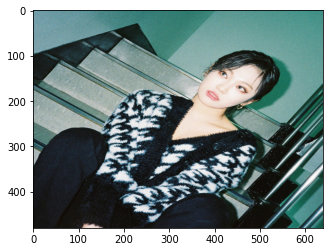

In [40]:
my_image_path = '/content/camera_sticker/images/rotation.jpg'
img_rotation = cv2.imread(my_image_path)   
img_rotation = cv2.resize(img_rotation, (640, 480))    
img_show = img_rotation.copy()     
plt.imshow(cv2.cvtColor(img_rotation, cv2.COLOR_BGR2RGB))
plt.show()

Ïù¥Î≤àÏóêÎäî ÏÇ¨ÏßÑ ÏûêÏ≤¥Í∞Ä Ï¢Ä ÎèåÏïÑÍ∞Ñ ÏÇ¨ÏßÑÏùÑ Îì§Í≥† ÏôîÏäµÎãàÎã§.

rectangles[]


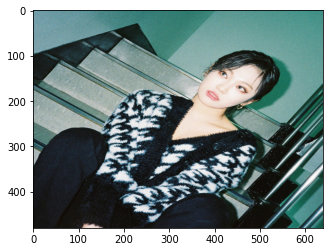

In [41]:
detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_rotation, 1)   # detector_hog(image, num of img pyramid)
print(dlib_rects)   # Ï∞æÏùÄ ÏñºÍµ¥ÏòÅÏó≠ Ï¢åÌëú

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

ÌóàÍ±±,, ÏïÑÏòà ÏñºÍµ¥ Í≤ÄÏ∂úÎ∂ÄÌÑ∞ Î™ªÌï¥ ÎÉÖÎãàÎã§ „Öú„Öú Ïù¥Î†áÍ≤å ÎêòÎ©¥ ÏïÑÏòà Ïä§Ìã∞Ïª§Î•º Î∂ôÏùº Ïàò ÏóÜÍ≤†Íµ∞Ïöî. ÎèåÏïÑÍ∞ÑÎßåÌÅº Î∞òÎåÄÎ°ú ÎèåÎ¶¨Î©¥ ÎêòÏßÄÎßå ÏùºÎ∞òÌôîÌïòÍ∏∞ ÌûòÎì§Í≤É Í∞ôÏäµÎãàÎã§.

### 5.3 Î©ÄÎ¶¨ÏÑú Ï∞çÏùÄ ÏÇ¨ÏßÑ

In [42]:
!cp /content/gdrive/MyDrive/Data/far.jpg camera_sticker/images

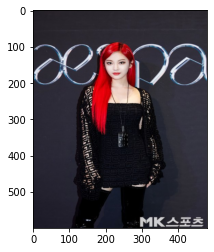

In [43]:
my_image_path = '/content/camera_sticker/images/far.jpg'
img_far = cv2.imread(my_image_path)   
img_far = cv2.resize(img_far, (480, 600))    
img_show = img_far.copy()     
plt.imshow(cv2.cvtColor(img_far, cv2.COLOR_BGR2RGB))
plt.show()

Ï†§ ÏúÑÏóêÏÑú ÌñàÎçò ÏÇ¨ÏßÑÎ≥¥Îã§ Ï¢Ä Îçî Î©ÄÎ¶¨ÏÑú Ï∞çÏùÄ ÏÇ¨ÏßÑÏùÑ Í∞ÄÏ†∏ÏôîÏäµÎãàÎã§.

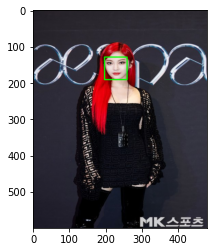

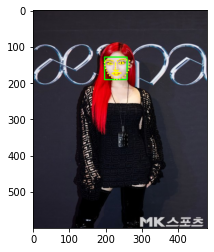

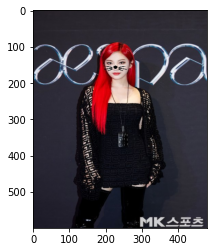

In [44]:

detector_hog = dlib.get_frontal_face_detector()   # detector ÏÑ†Ïñ∏
dlib_rects = detector_hog(img_far, 1)   # detector_hog(image, num of img pyramid)


for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_far, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    y = (landmark[2][1]+landmark[36][1]+landmark[48][1])//3
    w = dlib_rect.width()
    h = dlib_rect.width()


sticker_path = '/content/camera_sticker/images/cat-whiskers.png'

img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))


refined_x = x - w // 2  # left
refined_y = y - h // 2 # top

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:]
    refined_y = 0

sticker_area = img_far[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_far[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_far, cv2.COLOR_BGR2RGB))
plt.show()

Î©ÄÎ¶¨ ÏûàÏñ¥ÎèÑ ÏñºÍµ¥Ïù∏ÏãùÎßå ÎêòÎ©¥ Ïûò Îê©ÎãàÎã§!!

# ü§îÌöåÍ≥†Î°ùü§î
- ÎûúÎìúÎßàÌÅ¨Î•º Ïù¥Ïö©Ìï¥ÏÑú Ï§ëÏã¨ Ï¢åÌëúÎ•º ÏÑ§Ï†ïÌïúÌõÑ top-leftÎ°ú Îã§Ïãú ÏÑ§Ï†ïÌï¥Ï£ºÎäî Í≤ÉÏùÑ Ïù¥Ìï¥ÌïòÍ∏∞Í∞Ä Ïñ¥Î†§Ïõ†Îã§ (~~ÏßÄÍ∏àÏÉùÍ∞ÅÌï¥Î≥¥Îãà Î≥ÑÍ±∞ ÏïÑÎãåÎç∞,,~~)
- ÏñºÍµ¥Ïù¥ ÌöåÏ†ÑÎêòÏñ¥ÏûàÏùÑÎïå Í∏∞Ïö∏Í∏∞Ïóê Îî∞Îùº Ïä§Ìã∞Ïª§ÎèÑ ÌöåÏ†ÑÌïòÎ©¥ÎêòÏßÄÎßå Ï∏°Î©¥ÏÇ¨ÏßÑÏóêÏÑú Í≥µÍ∞ÑÏ†ÅÏúºÎ°ú ÎèåÏïÑÍ∞îÏùÑ ÎïåÎäî Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌï†Íπå??  --> Ïù¥Í±∞Ïóê ÎåÄÌï¥ÏÑú ÏïÑÏßÄÌä∏Ïóê ÎßéÏù¥ Ïò¨ÎùºÏôîÎäîÎç∞ Íµ¨ÌòÑÌïòÍ∏∞Ïóê ÏóÑÎëêÍ∞Ä ÏïàÎÇ¨Îã§,,, ÎÑàÎ¨¥ Ïñ¥Î†§ÏõåÏöî„Öú„Öú
- ÏÉùÍ∞ÅÎ≥¥Îã§ ÎûúÎìúÎßàÌÅ¨Î•º ÏûòÌï¥ÏÑú Ïã†Í∏∞ÌñàÎã§. 